In [7]:
class Person:
    def __init__(self, name:str, age:int):
        self.name = name
        self.age = age

    def greet(self):
        return f"Hello, my name is {self.name} and I am {self.age} years old."

In [8]:
person = Person(10202, 30)
person.name

10202

In [6]:
from dataclasses import dataclass

@dataclass
class Person:
    name:str
    age:int

person = Person(10202, 30)
person.name

10202

In [12]:
from pydantic import BaseModel

class Person(BaseModel):
    name:str
    age:int
person = Person(name="Alice", age=30)
person.name

'Alice'

In [1]:
from typing import TypedDict
class Person(TypedDict):
    name:str
    age:int
person = Person(name="Alice", age=30)
person['name']

'Alice'

In [14]:
type(person)

__main__.Person

In [16]:
person.dict()

/var/folders/qt/7qfpwbkx3cq0xb9m37811y000000gn/T/ipykernel_69093/287872838.py:1: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.12/migration/
  person.dict()


{'name': 'Alice', 'age': 30}

In [17]:
person.model_dump()

{'name': 'Alice', 'age': 30}

In [18]:
class Post(BaseModel):
    title: str
    content: str
    category:str="General"
    is_published:bool=False
post = Post(title="My First Post", content="This is the content of my first post.")
post.dict()

/var/folders/qt/7qfpwbkx3cq0xb9m37811y000000gn/T/ipykernel_69093/113083288.py:7: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.12/migration/
  post.dict()


{'title': 'My First Post',
 'content': 'This is the content of my first post.',
 'category': 'General',
 'is_published': False}

In [ ]:
class Posts(BaseModel):
    posts: list[Post]    
posts = Posts(posts=[post])

In [21]:
posts.dict()

/var/folders/qt/7qfpwbkx3cq0xb9m37811y000000gn/T/ipykernel_69093/3372282985.py:1: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.12/migration/
  posts.dict()


{'posts': [{'title': 'My First Post',
   'content': 'This is the content of my first post.',
   'category': 'General',
   'is_published': False}]}

In [24]:
from typing import List , Optional

class Post(BaseModel):
    title: str
    content: str
    category:str="General"
    is_published:bool=False
    tags: Optional[List[str]] = None

In [27]:
post1 = Post(title="My First Post1", content="This is the content of my first post.", tags=["python","pydantic"])

In [26]:
post.dict()

/var/folders/qt/7qfpwbkx3cq0xb9m37811y000000gn/T/ipykernel_69093/2284695528.py:1: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.12/migration/
  post.dict()


{'title': 'My First Post',
 'content': 'This is the content of my first post.',
 'category': 'General',
 'is_published': False,
 'tags': ['python', 'tutorial']}

In [28]:
post1.dict()

/var/folders/qt/7qfpwbkx3cq0xb9m37811y000000gn/T/ipykernel_69093/2236628245.py:1: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.12/migration/
  post1.dict()


{'title': 'My First Post1',
 'content': 'This is the content of my first post.',
 'category': 'General',
 'is_published': False,
 'tags': ['python', 'pydantic']}

In [ ]:
from pydantic import BaseModel, Field

class Post(BaseModel):
    title: str = Field(..., description="The title of the post",max_length=5)
    content: str = Field(..., description="The content of the post")
    price: float = Field(..., gt=0, description="The price of the post")
    category:str="General"
    is_published:bool=False
    tags: Optional[List[str]] = None
    

In [35]:
try:    
    post=Post(title="My First Post", content="This is the content of my first post.", price=-9.99)
except Exception as e:    
    print(e)

2 validation errors for Post
title
  String should have at most 5 characters [type=string_too_long, input_value='My First Post', input_type=str]
    For further information visit https://errors.pydantic.dev/2.12/v/string_too_long
price
  Input should be greater than 0 [type=greater_than, input_value=-9.99, input_type=float]
    For further information visit https://errors.pydantic.dev/2.12/v/greater_than


In [31]:
post.dict()

/var/folders/qt/7qfpwbkx3cq0xb9m37811y000000gn/T/ipykernel_69093/2284695528.py:1: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.12/migration/
  post.dict()


{'title': 'My First Post',
 'content': 'This is the content of my first post.',
 'price': 9.99,
 'category': 'General',
 'is_published': False,
 'tags': None}

In [ ]:
from pydantic import BaseModel

class User(BaseModel):
    username: str
    email: str = Field(..., description="The email of the user",pattern=r'^\S+@\S+\.\S+$')
    password: str

user_data={
    "username": "john_doe",
    "email": "john.doe@example.com",
    "password": "secure_password"
}

user=User(**user_data)

In [37]:
user

User(username='john_doe', email='john.doe@example.com', password='secure_password')

In [38]:
from pydantic import BaseModel
from enum import Enum
from typing import Literal


class Status(str, Enum):
    PENDING = "pending"
    COMPLETED = "completed"
    FAILED = "failed"


TransactionType =Literal["credit", "debit"]

class Transaction(BaseModel):
    status:Status
    transaction_type:TransactionType
transaction_data={
    "status": "completed",
    "transaction_type": "credit"
}
transaction=Transaction(**transaction_data)
transaction.dict()

/var/folders/qt/7qfpwbkx3cq0xb9m37811y000000gn/T/ipykernel_69093/3901190184.py:22: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.12/migration/
  transaction.dict()


{'status': <Status.COMPLETED: 'completed'>, 'transaction_type': 'credit'}

In [4]:
from pydantic import BaseModel, Field

class User(BaseModel):
    age: int= Field(..., gt=0, description="The age of the user")

user_data={
    "age": 10
}

In [5]:
User(**user_data)

User(age=10)

In [ ]:
from typing import Annotated

EmailStrAnnotated = Annotated[str, Field(..., description="The email of the user",pattern=r'^\S+@\S+\.\S+$')]   

class User(BaseModel):
    username: str
    email: EmailStrAnnotated
    password: str
user_data={
    "username": "john_doe",
    "email": "xyz@ssnk.com",
    "password": "secure_password"
}
User(**user_data)  

User(username='john_doe', email='xyz@ssnk.com', password='secure_password')

In [12]:
from langchain_ollama import ChatOllama
from typing import Literal
from langchain_core.prompts import ChatPromptTemplate


llm = ChatOllama(model="llama3.2",base_url="http://localhost:11434")

class LLMResponse(BaseModel):
    response: str=Field(..., description="The response from the LLM")
    social_media:Literal["linkedin", "twitter", "facebook", "instagram"] = Field(..., description="The social media post created by the topic user has provided")


prompt = ChatPromptTemplate.from_messages([
    ("system", "You are a helpful assistant that creates social media posts based on the topic provided by the user. The social media post should be detailed and engaging, and should be suitable for the specified social media platform."),
    ("human", "Create a social media post about {topic} for social_media.")
])

llm_response_structured=llm.with_structured_output(LLMResponse)

llm_chain= prompt | llm_response_structured

response = llm_chain.invoke({"Write me a post about pydantic for linkedin"})

print(response.dict())



{'response': "Here's a LinkedIn-style social media post about Pydantic:\n\n\n **Unlock Efficient Data Validation with Pydantic!** \n\nAs a developer, you know how crucial it is to ensure the quality and consistency of your data. That's where Pydantic comes in - a powerful Python library that simplifies data validation, making your code more maintainable and efficient.\n\nWith Pydantic, you can define your data models with ease, specifying the structure and constraints for each field. This ensures that your data conforms to a specific format, reducing errors and inconsistencies.\n\n**Benefits of using Pydantic:*\n\n • **Improved Data Consistency**: Ensure that your data meets the expected standards, reducing manual validation time.\n\n • **Enhanced Code Maintainability**: With automated validation, you can focus on writing meaningful code rather than redundant validation checks.\n\n • **Faster Development Cycles**: Pydantic's built-in support for schema generation and auto-completion sa

/var/folders/qt/7qfpwbkx3cq0xb9m37811y000000gn/T/ipykernel_11031/954627400.py:24: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.12/migration/
  print(response.dict())


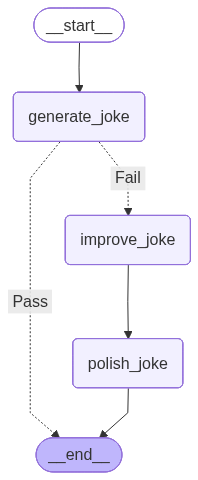

Initial joke:
Why did the AI program go to therapy?

Because it was struggling to process its emotions.

--- --- ---

Final joke:
Why did the AI program go to therapy?

Because it was struggling to process its emotions.


In [15]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display


# Graph state
class State(TypedDict):
    topic: str
    joke: str
    improved_joke: str
    final_joke: str


# Nodes
def generate_joke(state: State):
    """First LLM call to generate initial joke"""

    msg = llm.invoke(f"Write a short joke about {state['topic']}")
    return {"joke": msg.content}


def check_punchline(state: State):
    """Gate function to check if the joke has a punchline"""

    # Simple check - does the joke contain "?" or "!"
    if "?" in state["joke"] or "!" in state["joke"]:
        return "Pass"
    return "Fail"


def improve_joke(state: State):
    """Second LLM call to improve the joke"""

    msg = llm.invoke(f"Make this joke funnier by adding wordplay: {state['joke']}")
    return {"improved_joke": msg.content}


def polish_joke(state: State):
    """Third LLM call for final polish"""
    msg = llm.invoke(f"Add a surprising twist to this joke: {state['improved_joke']}")
    return {"final_joke": msg.content}


# Build workflow
workflow = StateGraph(State)

# Add nodes
workflow.add_node("generate_joke", generate_joke)
workflow.add_node("improve_joke", improve_joke)
workflow.add_node("polish_joke", polish_joke)

# Add edges to connect nodes
workflow.add_edge(START, "generate_joke")
workflow.add_conditional_edges(
    "generate_joke", check_punchline, {"Fail": "improve_joke", "Pass": END}
)
workflow.add_edge("improve_joke", "polish_joke")
workflow.add_edge("polish_joke", END)

# Compile
chain = workflow.compile()

# Show workflow
display(Image(chain.get_graph().draw_mermaid_png()))

# Invoke
state = chain.invoke({"topic": "ai"})
print("Initial joke:")
print(state["joke"])
print("\n--- --- ---\n")
if "improved_joke" in state:
    print("Improved joke:")
    print(state["improved_joke"])
    print("\n--- --- ---\n")

    print("Final joke:")
    print(state["final_joke"])
else:
    print("Final joke:")
    print(state["joke"])

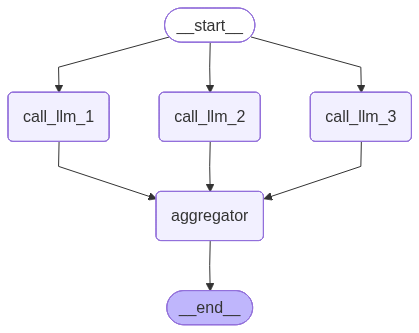

Here's a story, joke, and poem about cats!

STORY:
In the sleepy town of Willowdale, there was a quaint little shop called "Whisker Wonders." The store was run by an eccentric old cat lady named Mrs. Jenkins, who had a passion for all things feline. Shelves upon shelves of cat toys, scratching posts, and cozy blankets lined the walls of her cozy shop.

Mrs. Jenkins was no ordinary cat lover. She claimed to have been raised by a family of magical cats, who had taught her the ancient art of communicating with them telepathically. As she grew older, Mrs. Jenkins honed her skills, becoming one of the most skilled feline whisperers in all the land.

One sunny afternoon, a curious cat named Luna wandered into Whisker Wonders, seeking refuge from the hustle and bustle of city life. Her fur was a mesmerizing mosaic of blue and silver, with piercing green eyes that seemed to see right through you. Mrs. Jenkins was immediately smitten with the newcomer, sensing an extraordinary connection betwee

In [16]:
# Graph state
class State(TypedDict):
    topic: str
    joke: str
    story: str
    poem: str
    combined_output: str


# Nodes
def call_llm_1(state: State):
    """First LLM call to generate initial joke"""

    msg = llm.invoke(f"Write a joke about {state['topic']}")
    return {"joke": msg.content}


def call_llm_2(state: State):
    """Second LLM call to generate story"""

    msg = llm.invoke(f"Write a story about {state['topic']}")
    return {"story": msg.content}


def call_llm_3(state: State):
    """Third LLM call to generate poem"""

    msg = llm.invoke(f"Write a poem about {state['topic']}")
    return {"poem": msg.content}


def aggregator(state: State):
    """Combine the joke, story and poem into a single output"""

    combined = f"Here's a story, joke, and poem about {state['topic']}!\n\n"
    combined += f"STORY:\n{state['story']}\n\n"
    combined += f"JOKE:\n{state['joke']}\n\n"
    combined += f"POEM:\n{state['poem']}"
    return {"combined_output": combined}


# Build workflow
parallel_builder = StateGraph(State)

# Add nodes
parallel_builder.add_node("call_llm_1", call_llm_1)
parallel_builder.add_node("call_llm_2", call_llm_2)
parallel_builder.add_node("call_llm_3", call_llm_3)
parallel_builder.add_node("aggregator", aggregator)

# Add edges to connect nodes
parallel_builder.add_edge(START, "call_llm_1")
parallel_builder.add_edge(START, "call_llm_2")
parallel_builder.add_edge(START, "call_llm_3")
parallel_builder.add_edge("call_llm_1", "aggregator")
parallel_builder.add_edge("call_llm_2", "aggregator")
parallel_builder.add_edge("call_llm_3", "aggregator")
parallel_builder.add_edge("aggregator", END)
parallel_workflow = parallel_builder.compile()

# Show workflow
display(Image(parallel_workflow.get_graph().draw_mermaid_png()))

# Invoke
state = parallel_workflow.invoke({"topic": "cats"})
print(state["combined_output"])